# __Raw Project__

## Project Content

<a id = 0></a>

### First Step: First Organization

1. [Introduction](#1)
2. [Loading libraries and packages to embark our new journey](#2)
3. [Loading and Checking The Dataset](#3)

### Second Step: Data Preprocessing

4. [Exploratory Data Analysis](#4)
5. [Numeric Fields Analysis](#5)
6. [Categorical Fields Analysis](#6)
7. [Feature Scaling](#7)
8. [Correlation Analysis](#8)
9. [Dealing with Outliers](#9)
10. [Determining Distributions of Numeric Fields](#10)
11. [Appllying One Hot Encoding to Categorical Fields](#11)
12. [Feature Scaling with The RobustScaler Method](#12)
13. [Seperating Data into Two Parts of Train and Test](#13)

### Third and Final Step: Modeling

16. [Modelling (Logistic Regression)](#16)
17. [Cross Validation (Logistic Regression)](#17)
18. [AUC-ROC Curve (Logistic Regression)](#18)
19. [Hyper Parameter Optimization (Logistic Regression)](#19)
20. [Modelling (Decision Tree)](#20)
21. [Cross Validation (Decision Tree)](#21)
22. [AUC-ROC Curve (Decision Tree)](#22)
23. [Hyper Parameter Optimization (Decision Tree)](#23)
24. [Modelling (Support Vector Classifier)](#24)
25. [Cross Validation (Support Vector Classifier)](#25)
26. [AUC-ROC Curve (Support Vector Classifier)](#26)
27. [Hyper Parameter Optimization (Support Vector Classifier)](#27)
24. [Modelling (Random Forest)](#28)
25. [Cross Validation (Support Vector Classifier)](#29)
26. [AUC-ROC Curve (Support Vector Classifier)](#30)
27. [Hyper Parameter Optimization (Support Vector Classifier)](#31)

## 1. Introduction <a id = 1></a>

[Project Content](#0)

## 2. Loading packages and Defining Functions to Embark Our New Journey <a id = 2></a>

In [1]:
# Basic Python Packages

import warnings
warnings.filterwarnings("ignore")

# Numpy Library

import numpy as np

# Pandas Library

import pandas as pd

# Visualization Libraries (Matplotlib, Seaborn, Missingno)

import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Statsmodels Modules

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sklean Modules



%matplotlib inline

In [2]:
def f_num_unique_values(dataframe, fields = None):
    """
    By this function we can check how many unique values each field has

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list): The fields we want to check number of their unique values
    """
    
    num_unique_values_df = pd.DataFrame(columns = ["Field_Name", "Unique_Values_Num"])

    if fields == None:
        fields = dataframe.columns
        
    num_unique_values = []

    for field in fields:
        
        num_unique_values += [dataframe[field].nunique()]
        
    num_unique_values_df["Field_Name"] = fields
    num_unique_values_df["Unique_Values_Num"] = num_unique_values
        
    return num_unique_values_df

In [3]:
def f_unique_values(dataframe, fields):
    """
    By this function we can get a dataframe and categorical fields and show a dataframe of unique values of each field.

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list): The fields we want to check their unique values
        
    Returns:
        unique_values_df (pandas.core.frame.DataFrame): A dataframe of fields and their unique values
    """
    
    unique_values_df = pd.DataFrame(columns = ["Field_Name", "Unique_Values"])

    fields_list = []
    unique_values_list = []

    for field in fields:

        fields_list += [field]
        field_unique_values_list = list(dataframe[field].unique())
            
        unique_values_str = ""
            
        for values_str in field_unique_values_list:
            if field_unique_values_list.index(values_str) != len(field_unique_values_list) - 1:
                unique_values_str += str(values_str) + " | "
            else:
                unique_values_str += str(values_str)                 
            
        unique_values_list += [unique_values_str]
        
    unique_values_df["Field_Name"] = fields_list
    unique_values_df["Unique_Values"] = unique_values_list
        
    return unique_values_df

In [30]:
def f_cat_to_int(dataframe, fields = None):
    """
    _summary_

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list): The fields which we want to duplicate a integer format of them

    Returns:
        dataframe (pandas.core.frame.DataFrame): A dataframe which categorical fields have integer values
    """
    if fields == None:
        fields = list(dataframe.columns)
        
    cat_dict = {}

    for field in fields:
        
        cat_dict[field + "_str"] = list(dataframe[field].unique())
        cat_dict[field + "_int"] = [i for i in range(0, len(list(dataframe[field].unique())))]

        dataframe[field + "_int"] = dataframe[field]
        dataframe[field + "_int"].replace(cat_dict[field + "_str"], cat_dict[field + "_int"], inplace = True)
        
    return dataframe

In [5]:
def f_sorted_correlations(dataframe, fields = None, omited_fields = None, target_field = None, cat_num = None):
    """
    This function get a dataframe and fields to create a dataframe of correlation based on our demands.
    It can show a dataframe of correlations between each two fields in a sorted manner and also it can show a one row sorted correlation values between non-target fields and the target.

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        fields (list, optional): The fields we want to check their correlation
        omited_fields (list, optional): The fields we dont want to check their correlation
        target_field (list, optional): The target field we want to check its correlation with other fields
        cat_num (list, optional): The target field we want to check its correlation with other fields
        
    Returns:
        corr_df (pandas.core.frame.DataFrame): Final correlation matrix
    """
    
    if fields == None:
        fields = list(dataframe.columns)
    
    corr_dict = {}
    all_correlation_df = dataframe[fields].corr()
    
    if cat_num == None:
        
        if omited_fields != None:
            all_correlation_df.drop(omited_fields, axis = 0, inplace = True)
            all_correlation_df.drop(omited_fields, axis = 1, inplace = True)
        
        if target_field == None:
            for row in range(0, len(list(all_correlation_df.columns))):
                for column in range(row, len(list(all_correlation_df.columns))):
                    if row < column:
                        corr_dict[f"{list(all_correlation_df.columns)[row]}, {list(all_correlation_df.columns)[column]}"] = all_correlation_df.iloc[row, column]

            corr_df = pd.DataFrame(columns = ["Fields", "Correlation_Value"])

            corr_df["Fields"] = list(corr_dict.keys())
            corr_df["Correlation_Value"] = list(corr_dict.values())
            corr_df.sort_values(by = "Correlation_Value", inplace = True)
            
        else:
            corr_df = all_correlation_df[[target_field]]
            corr_df = corr_df.sort_values(by = target_field)
            corr_df.drop(target_field, axis = 0, inplace = True)
            corr_df = corr_df.T
            
    else:
        
        corr_df = ((dataframe[cat_num[0] + cat_num[1]].corr()[cat_num[0]]).T)[cat_num[1]]

    return corr_df

In [6]:
def f_vif_function(dataframe, omited_fields = None):
    """
    This function show a dataframe with sorted values of VIF of each field.

    Args:
        dataframe (pandas.core.frame.DataFrame): The main dataframe
        omited_fields (list, optional): The fields we dont want to check their correlation
                
    Returns:
        vif_info (pandas.core.frame.DataFrame): _description_
    """
    
    if omited_fields != None:
        dataframe.drop(omited_fields, axis = 1, inplace = True)
        
    vif_dict = {}
    
    vif_dict["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_df = ((pd.DataFrame(vif_dict, index = dataframe.columns)).sort_values(by = "VIF").T)
    
    return vif_df

[Project Content](#0)

## 3. Loading and Checking The Dataset <a id = 3></a>

### Loading The Dataset

In [7]:
df = pd.read_csv("Car-Dataset.csv")

### Checking The Dataset

In [8]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Examining Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Examining Number of Unique Values

In [10]:
f_num_unique_values(df)

,Field_Name,Unique_Values_Num
0,Car_Name,98
1,Year,16
2,Selling_Price,156
3,Present_Price,147
4,Kms_Driven,206
5,Fuel_Type,3
6,Seller_Type,2
7,Transmission,2
8,Owner,3


### Deleting Car Name Column

In [11]:
del df["Car_Name"]

df.head(5)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Separating Fields to Numerical and Categorical

In [12]:
fields_list = list(df.columns)
cat_f = ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]
num_f = fields_list

for column in cat_f:
    num_f.remove(column)

print("Categorical fields are:      ", cat_f)
print("Numerical fields are:        ", num_f)

Categorical fields are:       ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
Numerical fields are:         ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']


[Project Content](#0)

## 4. Exploratory Data Analysis <a id = 4></a>

### Examining Statistics of Numeric Fields

In [13]:
df[num_f].describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


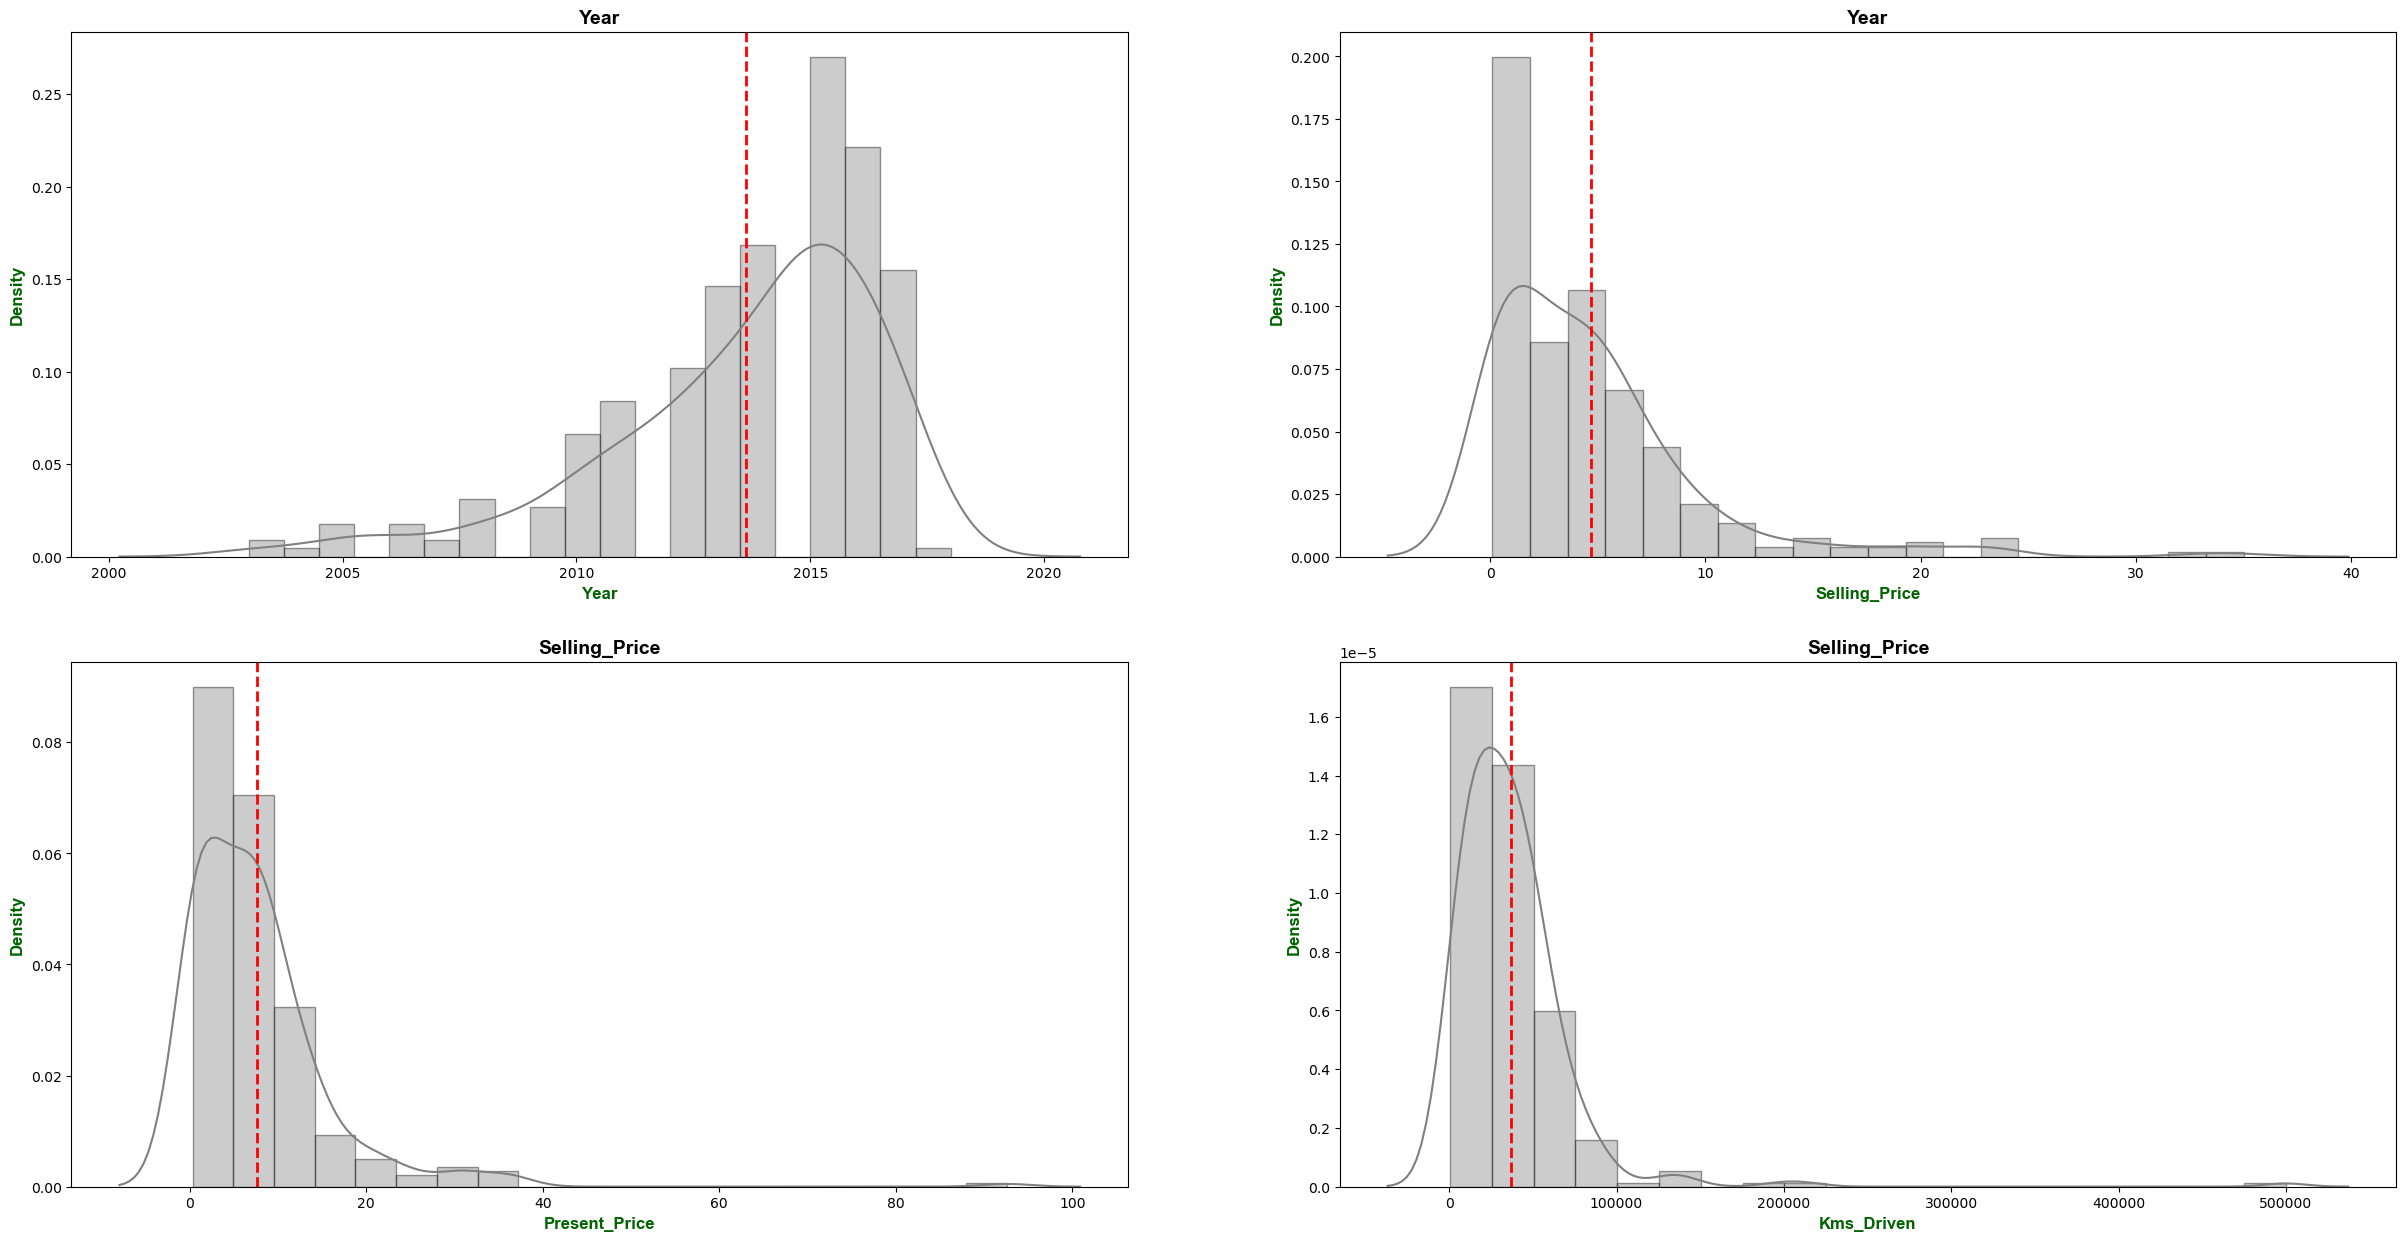

In [45]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
axes_font = {"family" : "arial", "color" : "darkgreen", "weight" : "bold", "size" : 12}

figure, axis = plt.subplots(2, 2, figsize = (30, 15))

i = 0
j = 0

for field in num_f:
    
    sns.distplot(df[field], kde = True, bins = 20, color = "gray", hist_kws = dict(linewidth = 1, edgecolor = "k"), ax = axis[i, j])
    axis[i, j].axvline(df[field].mean(), color = "r", ls = "--", lw = 2)
                
    axis[i, j].set_title(num_f[i], fontdict = title_font)
    axis[i, j].set_xlabel(field, fontdict = axes_font)
    axis[i, j].set_ylabel("Density", fontdict = axes_font)
    
    if ((j + 1) % 2) != 0:
        j += 1
    
    else:
        j = 0
        i += 1
  
plt.show()

### Examining Statistics of Categorical Fields

In [15]:
f_unique_values(df, cat_f)

,Field_Name,Unique_Values
0,Fuel_Type,Petrol | Diesel | CNG
1,Seller_Type,Dealer | Individual
2,Transmission,Manual | Automatic
3,Owner,0 | 1 | 3


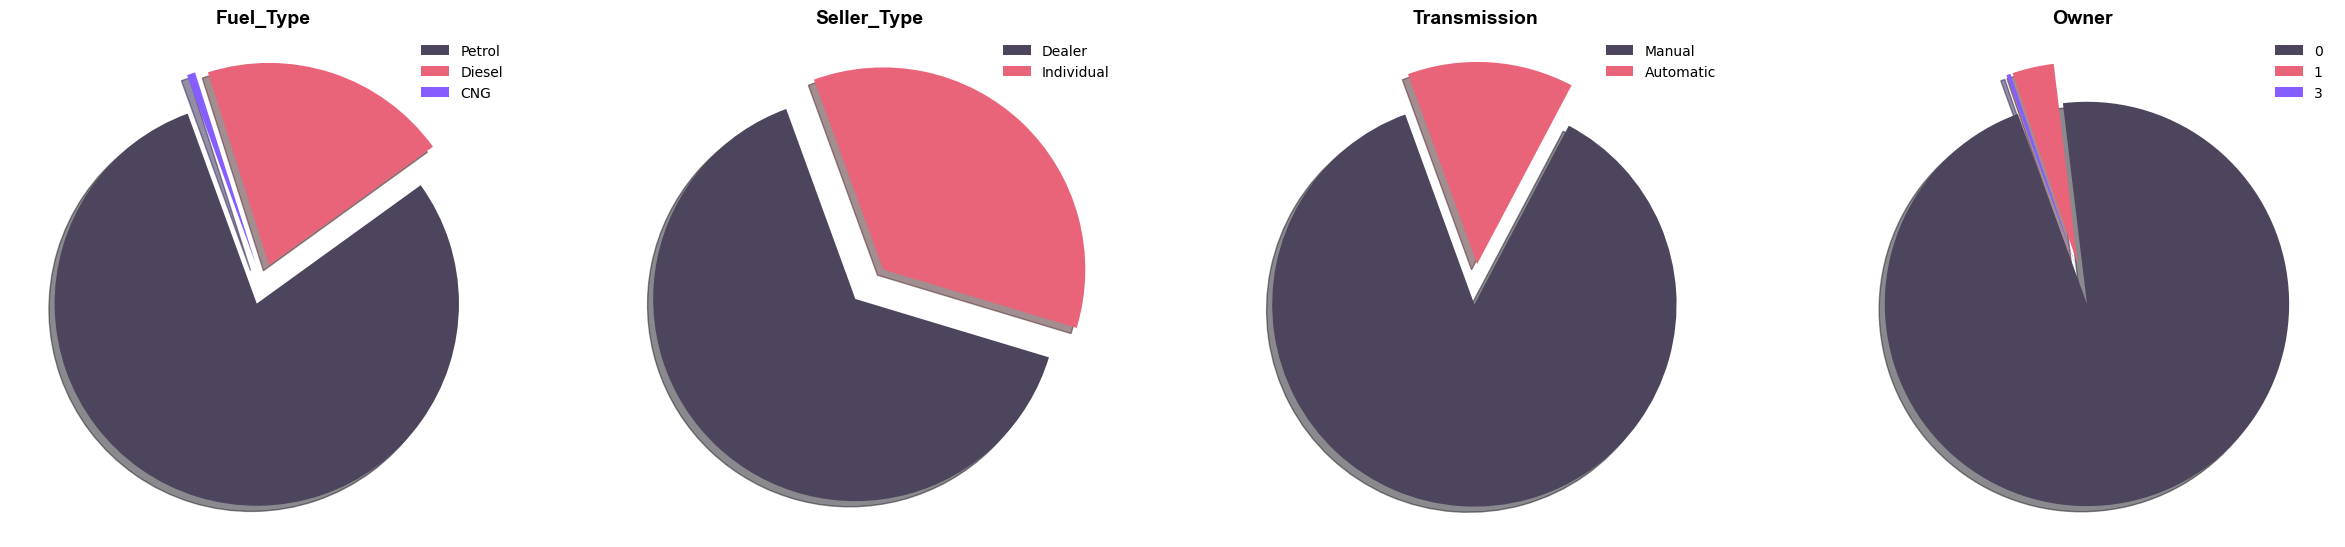

In [16]:
title_font = {"family" : "arial", "color" : "k", "weight" : "bold", "size" : 14}
text_font = {"family" : "arial", "color" : "k", "size" : 10}

colors = ["#4D455D", "#E96479", "#865DFF"]
explode = (0.1,)

figure, axis = plt.subplots(1, 4, figsize = (30, 40))

for field in cat_f:
    
    field_unique_values_list = list(df[field].unique())
    i = cat_f.index(field)
    
    axis[i].pie((np.array(df[field].value_counts())),
                labeldistance = 100, startangle = 110, colors = colors, shadow = True,
                explode = explode * len(np.array(df[field].value_counts())))
    
    axis[i].set_title(cat_f[i], fontdict = title_font)
    axis[i].legend(field_unique_values_list, loc = "upper right", frameon = False)
  
plt.show()

[Project Content](#0)

## 8. Adding an Integer Field for Each Categorical Field <a id = 8></a> 

In [17]:
df = f_cat_to_int(df, fields = cat_f[:-1])

df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_int,Seller_Type_int,Transmission_int
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,1,0,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              301 non-null    int64  
 1   Selling_Price     301 non-null    float64
 2   Present_Price     301 non-null    float64
 3   Kms_Driven        301 non-null    int64  
 4   Fuel_Type         301 non-null    object 
 5   Seller_Type       301 non-null    object 
 6   Transmission      301 non-null    object 
 7   Owner             301 non-null    int64  
 8   Fuel_Type_int     301 non-null    int64  
 9   Seller_Type_int   301 non-null    int64  
 10  Transmission_int  301 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 26.0+ KB


In [19]:
cat_f_int = [i + "_int" for i in cat_f[:-1]] + [cat_f[-1]]

cat_f_int

['Fuel_Type_int', 'Seller_Type_int', 'Transmission_int', 'Owner']

[Project Content](#0)

## 8. Correlation Analysis <a id = 8></a> 

### Analysis between Numeric Fields Among Themselves

In [20]:
f_sorted_correlations(df, num_f, omited_fields = "Selling_Price")

,Fields,Correlation_Value
1,"Year, Kms_Driven",-0.524342
0,"Year, Present_Price",-0.047584
2,"Present_Price, Kms_Driven",0.203647


### Correlation Analysis between Numeric Fields and Target

In [21]:
f_sorted_correlations(df, num_f, target_field = "Selling_Price")

,Kms_Driven,Year,Present_Price
Selling_Price,0.029187,0.236141,0.878983


### Correlation Analysis between Categorical Among Themselves

In [22]:
f_sorted_correlations(df, fields = cat_f_int)

,Fields,Correlation_Value
0,"Fuel_Type_int, Seller_Type_int",-0.352415
3,"Seller_Type_int, Transmission_int",-0.063240
2,"Fuel_Type_int, Owner",-0.055705
5,"Transmission_int, Owner",0.050316
1,"Fuel_Type_int, Transmission_int",0.080466
4,"Seller_Type_int, Owner",0.124269


### Correlation Analysis between Categorical Fields and Target

In [23]:
f_sorted_correlations(df, cat_f_int + ["Selling_Price"], target_field = "Selling_Price")

,Seller_Type_int,Owner,Transmission_int,Fuel_Type_int
Selling_Price,-0.550724,-0.088344,0.367128,0.509467


### Numeric and Categorical Fields Correlation Analysis

In [24]:
f_sorted_correlations(df, cat_num = [cat_f_int, num_f])

,Year,Selling_Price,Present_Price,Kms_Driven
Fuel_Type_int,0.053643,0.509467,0.440415,0.166801
Seller_Type_int,-0.039896,-0.550724,-0.512030,-0.101419
Transmission_int,-0.000394,0.367128,0.348715,0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216


In [25]:
f_vif_function(df[num_f + cat_f_int], omited_fields = ["Selling_Price"])

,Owner,Transmission_int,Fuel_Type_int,Kms_Driven,Seller_Type_int,Present_Price,Year
VIF,1.065787,1.36193,1.620168,2.042232,2.229093,3.164007,4.427574


[Project Content](#0)

## 9. Dealing with Outliers <a id = 9></a> 

[Project Content](#0)

### 12. Determining Distributions of Numeric Fields <a id = 12></a> 

[Project Content](#0)

### 13. Appllying One Hot Encoding to Categorical Fields <a id = 13></a> 

[Project Content](#0)

### 14. Feature Scaling with The RobustScaler Method <a id = 14></a> 

[Project Content](#0)

### 15. Seperating Data into Two Parts of Train and Test <a id = 15></a> 

[Project Content](#0)

### 16. Modelling (Logistic Regression) <a id = 16></a> 

### 17. Cross Validation (Logistic Regression) <a id = 17></a> 

### 18. AUC-ROC Curve (Logistic Regression) <a id = 18></a> 

### 19. Hyper Parameter Optimization (Logistic Regression) <a id = 19></a> 

### 20. Modelling (Desicion Tree) <a id = 20></a> 

### 21. Cross Validation (Desicion Tree) <a id = 21></a> 

### 22. AUC-ROC Curve (Desicion Tree) <a id = 22></a> 

### 23. Hyper Parameter Optimization (Desicion Tree) <a id = 23></a> 

### 24. Modelling (Support Vector Classification) <a id = 24></a> 

### 25. Cross Validation (Support Vector Classification) <a id = 25></a> 

### 26. AUC-ROC Curve (Support Vector Classification) <a id = 26></a> 

### 27. Hyper Parameter Optimization (Support Vector Classification) <a id = 27></a> 

### 28. Modelling (Random Forest Classification) <a id = 28></a> 

### 29. Cross Validation (Random Forest Classification) <a id = 29></a> 

### 30. AUC-ROC Curve (Random Forest Classification) <a id = 30></a> 

### 31. Hyper Parameter Optimization (Random Forest Classification) <a id = 31></a> 